# Rainfall Prediction Model Using Random Forest Algorithm

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pickle

In [41]:
data = pd.read_csv("../dataset/Rainfall.csv")
data.head(10)

day  pressure   maxtemp  temparature  mintemp  dewpoint  humidity   cloud   \
0    1     1025.9     19.9         18.3     16.8      13.1         72      49   
1    2     1022.0     21.7         18.9     17.2      15.6         81      83   
2    3     1019.7     20.3         19.3     18.0      18.4         95      91   
3    4     1018.9     22.3         20.6     19.1      18.8         90      88   
4    5     1015.9     21.3         20.7     20.2      19.9         95      81   
5    6     1018.8     24.3         20.9     19.2      18.0         84      51   
6    7     1021.8     21.4         18.8     17.0      15.0         79      56   
7    8     1020.8     21.0         18.4     16.5      14.4         78      28   
8    9     1020.6     18.9         18.1     17.1      14.3         78      79   
9   10     1017.5     18.5         18.0     17.2      15.5         85      91   

  rainfall  sunshine           winddirection  windspeed  
0      yes       9.3                    80.0       26.3  
1      yes       0.6                    50.0       15.3  
2      yes       0.0                    40.0       14.2  
3      yes       1.0                    50.0       16.9  
4      yes       0.0                    40.0       13.7  
5      yes       7.7                    20.0       14.5  
6       no       3.4                    30.0       21.5  
7       no       7.7                    60.0       14.3  
8       no       3.3                    70.0       39.3  
9      yes       0.0                    70.0       37.7

In [42]:
data.shape

(366, 12)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [44]:
data.duplicated().sum()

np.int64(0)

In [45]:
data.isnull().sum()

day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    1
windspeed                 1
dtype: int64

In [46]:
# Assuming df is your DataFrame
data.columns = data.columns.str.strip()

In [47]:
data.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [48]:
data["rainfall"].value_counts()

rainfall
yes    249
no     117
Name: count, dtype: int64

In [49]:
percentages = data['rainfall'].value_counts(normalize=True) * 100
print(percentages)

rainfall
yes    68.032787
no     31.967213
Name: proportion, dtype: float64


In [50]:
data.sample(10)

day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  cloud  \
304   31    1020.4     27.2         25.6     24.4      21.6        79     66   
1      2    1022.0     21.7         18.9     17.2      15.6        81     83   
262   19    1012.2     30.6         28.3     26.8      24.3        79     67   
200   19    1007.9     32.3         29.9     26.7      25.8        79     78   
161   10    1005.7     31.1         27.9     26.6      25.8        89     80   
0      1    1025.9     19.9         18.3     16.8      13.1        72     49   
42    12    1013.4     21.6         19.2     17.6      18.5        95     86   
57    27    1024.7     17.5         15.5     13.8      11.7        79     79   
271   28    1006.7     32.8         29.0     25.8      20.6        61     30   
255   12    1011.5     30.5         27.9     26.2      23.2        76     66   

    rainfall  sunshine  winddirection  windspeed  
304      yes       5.3           80.0       40.8  
1        yes       0.6           50.0       15.3  
262       no       3.8          180.0        8.1  
200      yes       4.1          220.0       25.1  
161      yes       4.5          220.0       14.6  
0        yes       9.3           80.0       26.3  
42       yes       0.6           30.0       13.9  
57       yes       5.0           20.0        9.1  
271       no      11.1           10.0       16.4  
255      yes       6.7           90.0       22.6

In [51]:
# dropping the unwanted features
data = data.drop("day", axis=1)
data.sample(10)

pressure  maxtemp  temparature  mintemp  dewpoint  humidity  cloud  \
324    1017.2     25.9         24.8     24.4      21.6        82     73   
184    1008.7     31.5         29.4     27.3      25.8        82     84   
160    1005.7     31.7         28.2     26.6      25.7        86     79   
345    1016.4     23.0         19.9     17.9      15.5        76     72   
11     1019.9     18.5         17.3     16.1      13.7        79     86   
173    1009.5     33.7         30.5     28.5      25.3        75     32   
209    1009.7     32.9         30.1     28.1      24.8        74     29   
92     1015.6     23.8         21.3     19.8      19.6        90     81   
274    1013.0     31.7         28.8     26.4      25.3        81     84   
78     1013.0     24.9         22.4     20.3      21.4        94     85   

    rainfall  sunshine  winddirection  windspeed  
324      yes       1.1           80.0       30.6  
184      yes       1.8          190.0       25.1  
160      yes       6.5            NaN        NaN  
345       no       6.3           60.0       20.7  
11        no       0.6           20.0       23.9  
173       no       9.3          220.0       10.9  
209       no      11.8          240.0       12.8  
92       yes       1.5           40.0       14.5  
274      yes       2.9           30.0        7.9  
78       yes       1.5           40.0       12.5

In [52]:
data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [53]:
data["winddirection"].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [54]:
data["winddirection"].median()

np.float64(70.0)

In [55]:
data["winddirection"].mode()

0    20.0
Name: winddirection, dtype: float64

In [56]:
data["windspeed"].median()

np.float64(20.5)

In [57]:
data["windspeed"].mean()

np.float64(21.53698630136986)

In [58]:
data["windspeed"].mode()

0    14.5
Name: windspeed, dtype: float64

In [59]:
# filling the missing values
data["winddirection"] = data["winddirection"].fillna(data["winddirection"].mode()[0])
data["windspeed"] = data["windspeed"].fillna(data["windspeed"].median())

In [60]:
data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [61]:
data["winddirection"].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
       160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [62]:
data["rainfall"].value_counts()

rainfall
yes    249
no     117
Name: count, dtype: int64

In [63]:
# encoding the rainfall feature into numerical: yes-->1, no-->0
data["rainfall"] = data["rainfall"].replace(
    {"yes": 1, "no": 0}
)

/tmp/ipykernel_7757/1650937539.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["rainfall"] = data["rainfall"].replace(


In [64]:
data["rainfall"].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [65]:
sns.set_theme(
    style="whitegrid",
    context="paper",
    palette="deep",
    font="sans-serif",
    font_scale=1,
    rc=None
)

In [66]:
data.describe()

pressure     maxtemp  temparature     mintemp    dewpoint  \
count   366.000000  366.000000   366.000000  366.000000  366.000000   
mean   1013.742623   26.191257    23.747268   21.894536   19.989071   
std       6.414776    5.978343     5.632813    5.594153    5.997021   
min     998.500000    7.100000     4.900000    3.100000   -0.400000   
25%    1008.500000   21.200000    18.825000   17.125000   16.125000   
50%    1013.000000   27.750000    25.450000   23.700000   21.950000   
75%    1018.100000   31.200000    28.600000   26.575000   25.000000   
max    1034.600000   36.300000    32.400000   30.000000   26.700000   

         humidity       cloud    rainfall    sunshine  winddirection  \
count  366.000000  366.000000  366.000000  366.000000     366.000000   
mean    80.177596   71.128415    0.680328    4.419399     101.284153   
std     10.062470   21.798012    0.466988    3.934398      81.722827   
min     36.000000    0.000000    0.000000    0.000000      10.000000   
25%     75.000000   58.000000    0.000000    0.500000      40.000000   
50%     80.500000   80.000000    1.000000    3.500000      70.000000   
75%     87.000000   88.000000    1.000000    8.200000     190.000000   
max     98.000000  100.000000    1.000000   12.100000     350.000000   

        windspeed  
count  366.000000  
mean    21.534153  
std     10.056054  
min      4.400000  
25%     13.725000  
50%     20.500000  
75%     27.825000  
max     59.500000

In [67]:
data.corr()

pressure   maxtemp  temparature   mintemp  dewpoint  humidity  \
pressure       1.000000 -0.829088    -0.851780 -0.839851 -0.860232 -0.274907   
maxtemp       -0.829088  1.000000     0.986193  0.961534  0.899829  0.021882   
temparature   -0.851780  0.986193     1.000000  0.990187  0.936866  0.092030   
mintemp       -0.839851  0.961534     0.990187  1.000000  0.944515  0.139040   
dewpoint      -0.860232  0.899829     0.936866  0.944515  1.000000  0.425282   
humidity      -0.274907  0.021882     0.092030  0.139040  0.425282  1.000000   
cloud          0.005621 -0.289765    -0.205895 -0.156097  0.044635  0.655493   
rainfall      -0.089275 -0.101003    -0.037360 -0.007697  0.139916  0.489623   
sunshine      -0.198171  0.507416     0.420545  0.368288  0.185234 -0.563579   
winddirection -0.656828  0.625447     0.645266  0.629738  0.623952  0.099471   
windspeed      0.373587 -0.442095    -0.393619 -0.359013 -0.378227 -0.076740   

                  cloud  rainfall  sunshine  winddirection  windspeed  
pressure       0.005621 -0.089275 -0.198171      -0.656828   0.373587  
maxtemp       -0.289765 -0.101003  0.507416       0.625447  -0.442095  
temparature   -0.205895 -0.037360  0.420545       0.645266  -0.393619  
mintemp       -0.156097 -0.007697  0.368288       0.629738  -0.359013  
dewpoint       0.044635  0.139916  0.185234       0.623952  -0.378227  
humidity       0.655493  0.489623 -0.563579       0.099471  -0.076740  
cloud          1.000000  0.625766 -0.848334      -0.077037   0.258248  
rainfall       0.625766  1.000000 -0.552519      -0.015058   0.154193  
sunshine      -0.848334 -0.552519  1.000000       0.251374  -0.298922  
winddirection -0.077037 -0.015058  0.251374       1.000000  -0.219379  
windspeed      0.258248  0.154193 -0.298922      -0.219379   1.000000

In [68]:
data.shape

(366, 11)

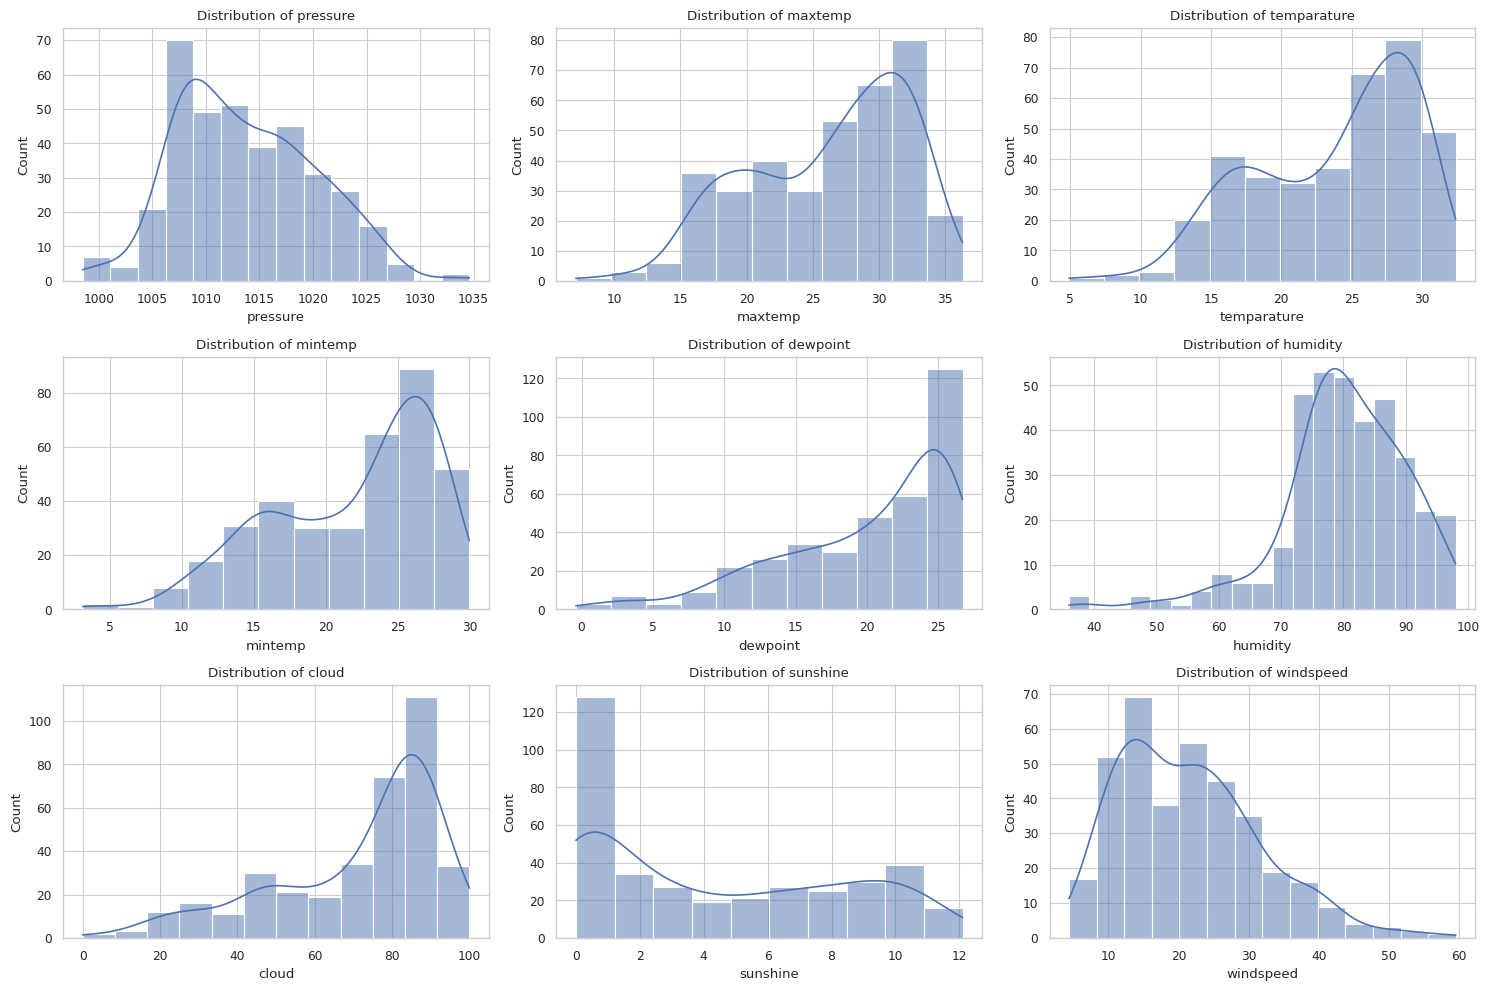

In [69]:
# plotting
plot_columns = ["pressure", "maxtemp", "temparature", "mintemp", "dewpoint", "humidity", "cloud", "sunshine", "windspeed"]

plt.figure(figsize=(15, 10))
for i, column in enumerate(plot_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

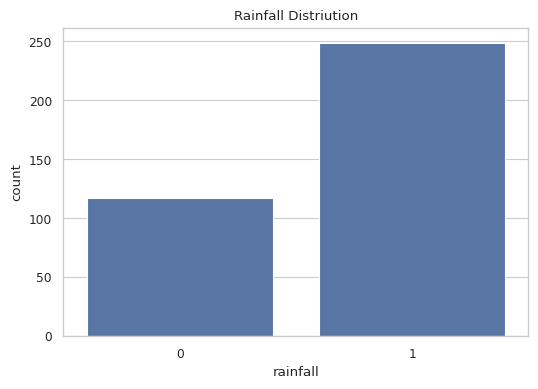

In [70]:
# rainfall distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="rainfall", data=data)
plt.title("Rainfall Distriution")
plt.show()

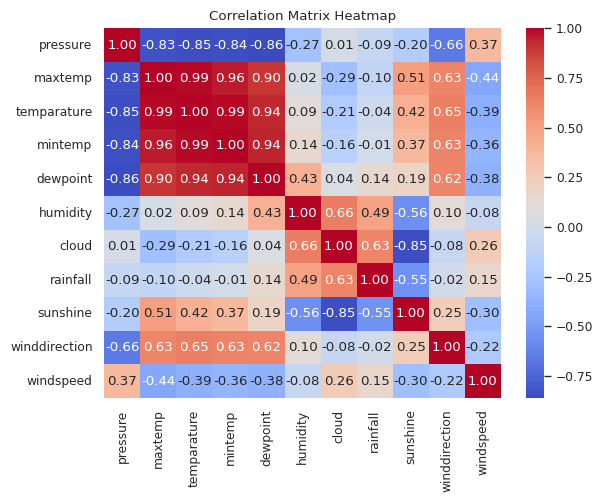

In [71]:
# correlation matrix
corr = data.corr()

plt.Figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Matrix Heatmap")
plt.show()

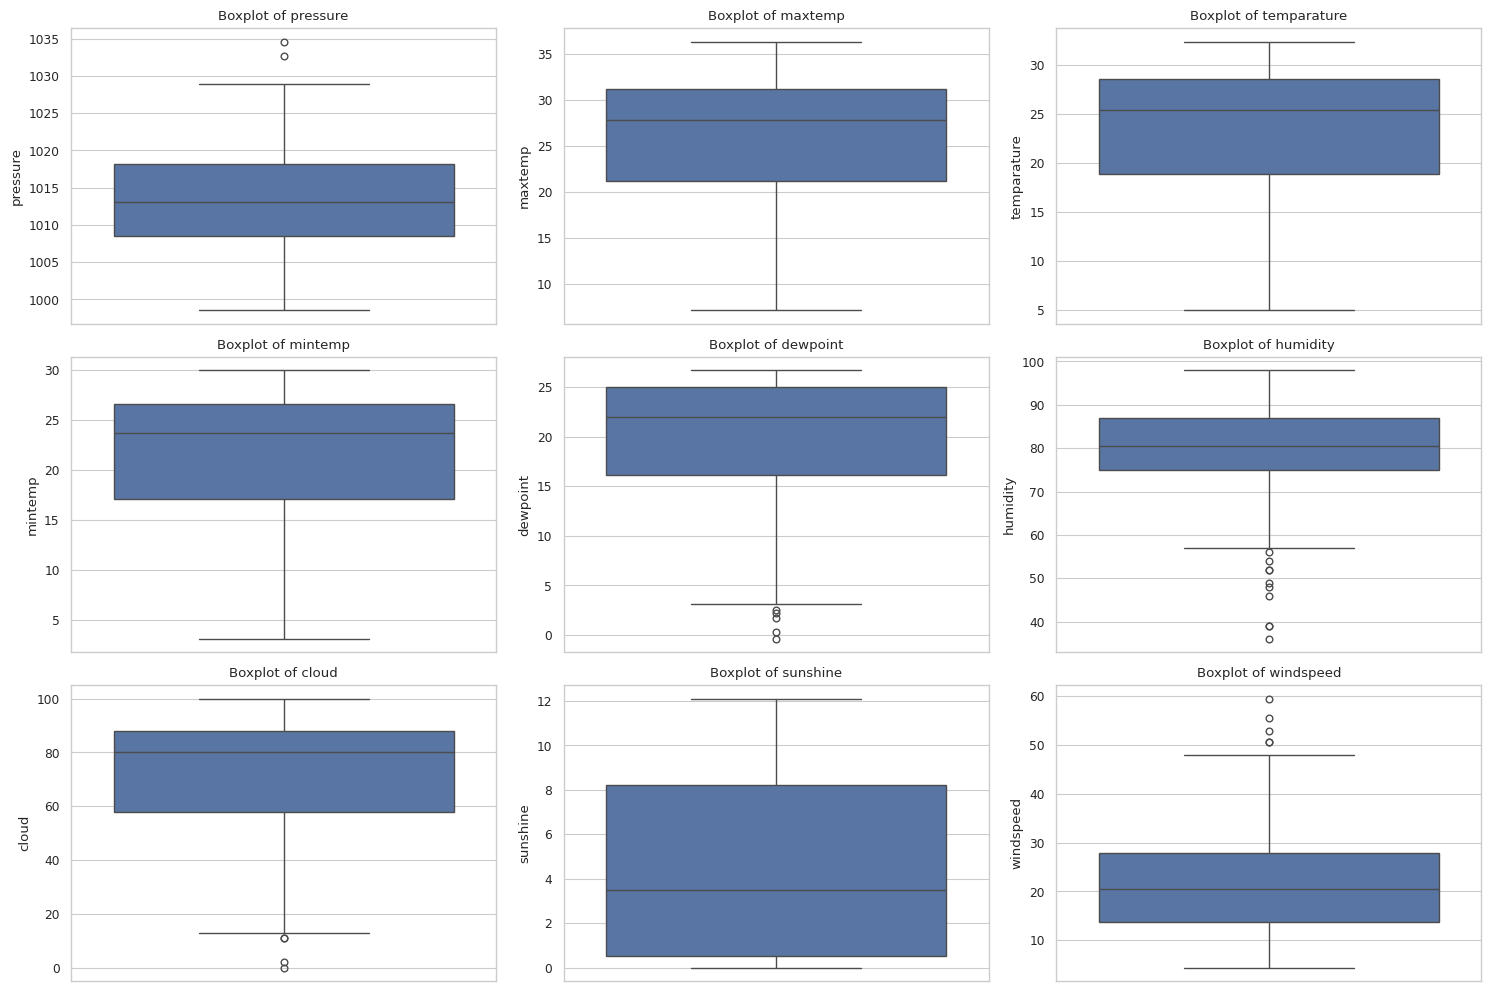

In [72]:
# box plot distributions
plt.figure(figsize=(15, 10))
for i, column in enumerate(plot_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[column])
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

In [73]:
# dropping temperature files t avoid multicolinearity
data = data.drop(columns=["maxtemp", "mintemp", "temparature"])
data.sample(10)

pressure  dewpoint  humidity  cloud  rainfall  sunshine  winddirection  \
47     1024.1       8.9        77     91         1       0.0           20.0   
125    1010.5      25.1        84     85         0       2.0          180.0   
323    1017.0      22.9        84     58         1       5.9           70.0   
199    1007.5      25.3        74     72         1      10.1          230.0   
317    1015.2      22.1        92     86         1       0.3           80.0   
176    1008.9      26.1        74     39         0      10.6          150.0   
34     1021.8      10.9        76     45         0       9.2           40.0   
86     1024.1       8.4        58     19         0      11.1           30.0   
283    1013.7      19.9        77     85         1       0.6           20.0   
280    1012.7      25.0        92     85         1       0.7          140.0   

     windspeed  
47        19.2  
125       15.4  
323       22.1  
199       23.7  
317       29.7  
176        9.1  
34         9.1  
86        14.6  
283       30.2  
280       12.5